In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import random
import seaborn

from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('../data/titanic/train.csv')
df_test = pd.read_csv('../data/titanic/test.csv')

In [3]:
df_train.shape

(891, 12)

In [4]:
df_test.shape

(418, 11)

In [5]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
df_train = df_train.rename(columns = {'Pclass': 'Ticket_class', 'SibSp': 'Sibling_Spouse_relations', 'Parch': 'Parent_Child_relations'})
df_test = df_test.rename(columns = {'Pclass': 'Ticket_class', 'SibSp': 'Sibling_Spouse_relations', 'Parch': 'Parent_Child_relations'})

In [7]:
columns_list = df_train.columns[df_train.isna().any()].tolist()
for i in columns_list:
    print(i, df_train[i].isna().values.sum())

Age 177
Cabin 687
Embarked 2


In [8]:
columns_list = df_test.columns[df_test.isna().any()].tolist()
for i in columns_list:
    print(i, df_test[i].isna().values.sum())

Age 86
Fare 1
Cabin 327


In [9]:
df_train = df_train.drop(columns=['Cabin', 'Ticket'])
df_test = df_test.drop(columns=['Cabin', 'Ticket'])

In [10]:
df_train_age_mean = float('{:.2f}'.format(df_train['Age'].mean()))

df_train['Age'] = df_train['Age'].fillna(value = df_train['Age'].mean())
df_test['Age'] = df_test['Age'].fillna(value = df_train_age_mean)

In [11]:
df_train = df_train.dropna()
df_train = df_train.iloc[:-1]

In [12]:
df_train.shape

(888, 10)

In [13]:
df_test = df_test.dropna()
df_test = df_test.iloc[:-5]

In [14]:
df_test.shape

(412, 9)

In [15]:
X_train = df_train[['Ticket_class', 'Sex', 'Age', 'Sibling_Spouse_relations', 'Parent_Child_relations', 'Fare', 'Embarked']]
y_train = df_train['Survived']

In [16]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [17]:
X_train = pd.get_dummies(X_train, prefix=['Sex', 'Embarked'], columns=['Sex', 'Embarked'])

In [18]:
y_train.sort_values(inplace=True)
X_train = X_train.reindex(y_train.index)

In [19]:
X_test = df_test[['Ticket_class', 'Sex', 'Age', 'Sibling_Spouse_relations', 'Parent_Child_relations', 'Fare', 'Embarked']]

In [20]:
X_test = pd.get_dummies(X_test, prefix=['Sex', 'Embarked'], columns=['Sex', 'Embarked'])

In [21]:
# standardize the numerical features
standardize = StandardScaler()
standardize.fit(X_train.loc[:, ['Age', 'Fare']], y_train)

# standardize.transform(...)
X_train.loc[:, ['Age', 'Fare']] = standardize.transform(X_train.iloc[:, [1, 4]])
X_test.loc[:, ['Age', 'Fare']] = standardize.transform(X_test.iloc[:, [1, 4]])

In [22]:
def blend(prob, colors=[[1, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0.77, 0]]):
    blended = []
    for p in prob:
        r, g, b = 0, 0, 0
        for i in range(len(colors)):
            r, g, b = r+p[i]*colors[i][0], g+p[i]*colors[i][1], b+p[i]*colors[i][2]
        blended.append([r, g, b]) 
    return blended

**Train the classifiers on:**
- X_train 

#### MLPClassifier, GaussianNB, KNeighborsClassifier, RandomForestClassifier, LogisticRegression

In [23]:
models = [MLPClassifier(), GaussianNB(), KNeighborsClassifier(),RandomForestClassifier(), LogisticRegression()]

In [24]:
labels = [x.__class__.__name__ for x in models]

In [25]:
model_predictions = []

In [26]:
X_train.shape

(888, 10)

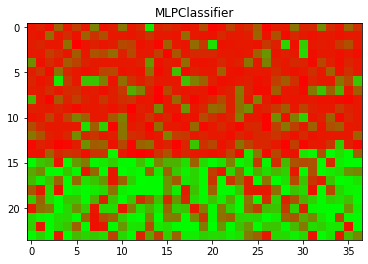

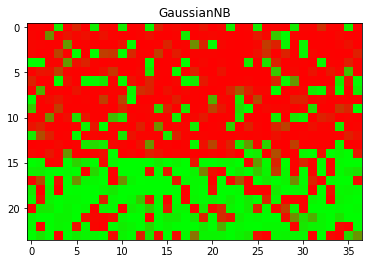

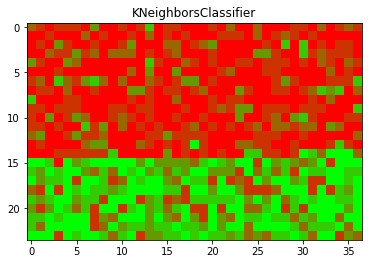

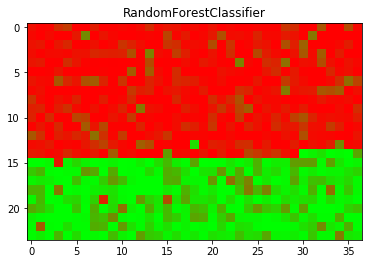

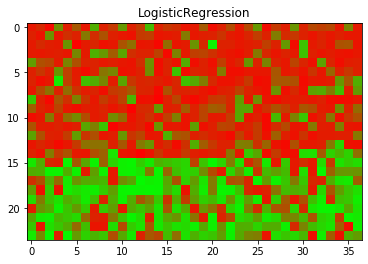

In [27]:
for model in models:
    model.fit(X_train, y_train)
    model_predictions.append(model.predict(X_train))
    blended = blend(model.predict_proba(X_train), colors=[[1,0,0], [0, 1, 0]])
    to_plot = []
    k = 0
    for i in range(24):
        row = []
        for j in range(37):
            row.append(blended[k])
            k+=1
        to_plot.append(row)
    #plt.imshow(np.reshape(blend(model.predict_proba(X_train), colors=[[1,0,0], [0, 1, 0]]), (24, 37, 3)));
    plt.title(model.__class__.__name__)
    plt.imshow(to_plot);
    plt.show()

In [28]:
matrix = np.zeros((len(models), len(models)))

In [29]:
for i, pred1 in enumerate(model_predictions):
    for j, pred2 in enumerate(model_predictions):
        matrix[i, j] = sum([1 for x, y in zip(pred1, pred2) if x == y])

#### MLPClassifier

In [30]:
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)
nn_model_y_test_predictions = nn_model.predict(X_test)

**Train the other classifiers on:**
- X_train + more labeled points given by the "reference” model

In [31]:
X_train = np.concatenate((X_train, X_test), axis=0)
y_train = np.concatenate((y_train.to_numpy(), nn_model_y_test_predictions), axis=0)

In [32]:
X_train.shape

(1300, 10)

In [33]:
model_predictions = []

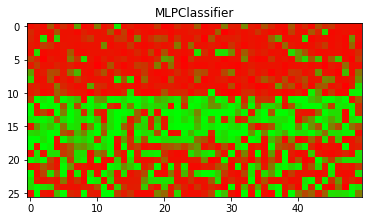

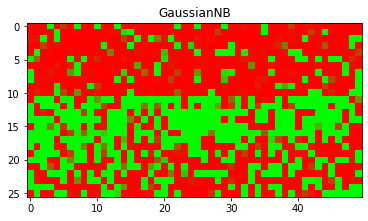

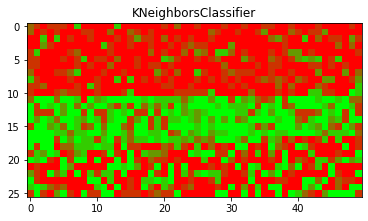

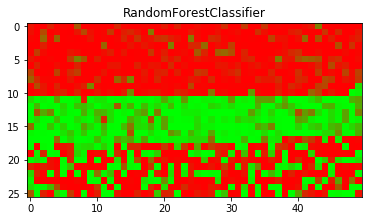

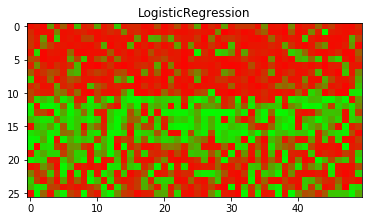

In [34]:
for model in models:
    model.fit(X_train, y_train)
    model_predictions.append(model.predict(X_train))
    blended = blend(model.predict_proba(X_train), colors=[[1,0,0], [0, 1, 0]])
    to_plot = []
    k = 0
    for i in range(26):
        row = []
        for j in range(50):
            row.append(blended[k])
            k+=1
        to_plot.append(row)
    #plt.imshow(np.reshape(blend(model.predict_proba(X_train), colors=[[1,0,0], [0, 1, 0]]), (70, 100, 3)));
    plt.title(model.__class__.__name__)
    plt.imshow(to_plot);
    plt.show()

In [35]:
matrix2 = np.zeros((len(models), len(models)))

In [36]:
for i, pred1 in enumerate(model_predictions):
    for j, pred2 in enumerate(model_predictions):
        matrix2[i, j] = sum([1 for x, y in zip(pred1, pred2) if x == y])

#### Comparison

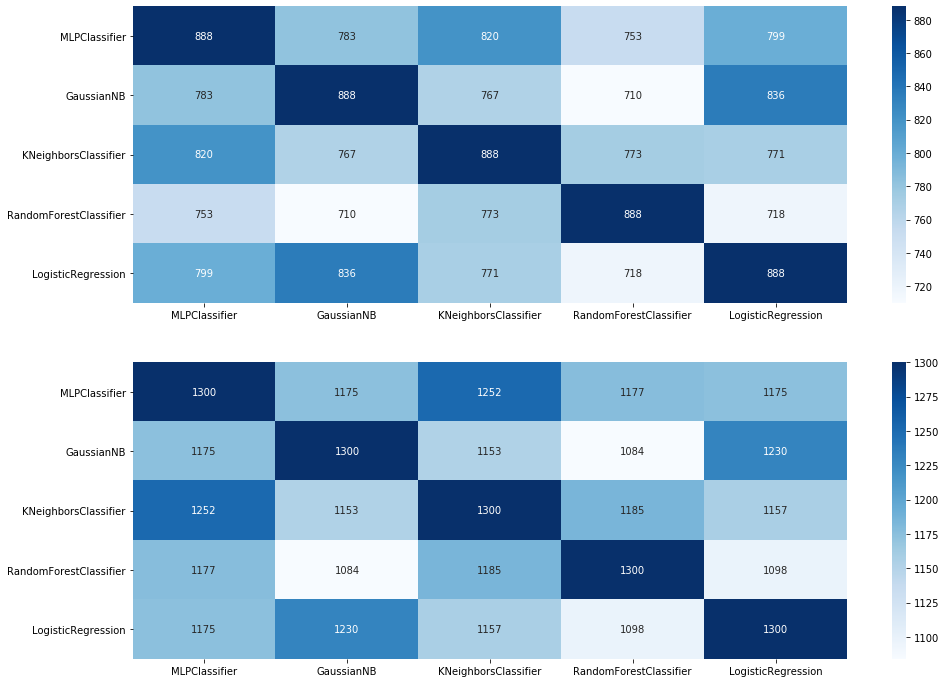

In [37]:
plt.figure(figsize=(16, 12))
plt.subplot(211)
seaborn.heatmap(matrix, xticklabels=labels,yticklabels=labels, cmap='Blues', annot=True, fmt='g')
plt.subplot(212)
seaborn.heatmap(matrix2, xticklabels=labels,yticklabels=labels, cmap='Blues', annot=True, fmt='g')

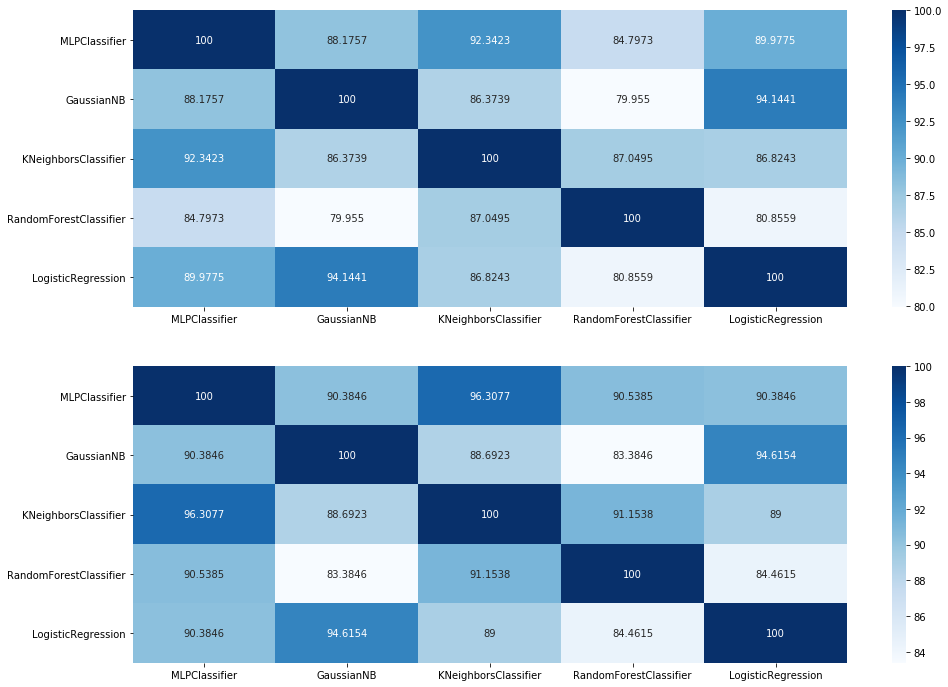

In [38]:
plt.figure(figsize=(16, 12))
plt.subplot(211)
seaborn.heatmap(matrix / matrix.max() * 100, xticklabels=labels,yticklabels=labels, cmap='Blues', annot=True, fmt='g')
plt.subplot(212)
seaborn.heatmap(matrix2 / matrix2.max() * 100, xticklabels=labels,yticklabels=labels, cmap='Blues', annot=True, fmt='g')

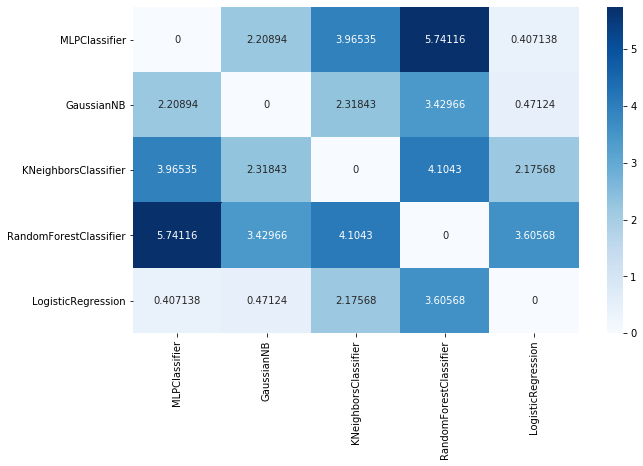

In [39]:
plt.figure(figsize=(10, 6))
seaborn.heatmap(matrix2 / matrix2.max() * 100 - matrix / matrix.max() * 100, xticklabels=labels,yticklabels=labels, cmap='Blues', annot=True, fmt='g')